In [58]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier


<center><h1> MCD - Ciencia de Datos Responsable </h1><center>
<center><h2> Tarea 3: Modelos interpretables y xAI <h2><center>    

    
## Instrucciones:

- La siguiente tarea es **individual**.
- La calificación de esta tarea se hará de forma **manual**, es decir, esta tarea no cuenta con test cases automáticos. Es por esto que al hacer entrega de su tarea podrá ver una calificación de "0%" y "Aprobado", independiente del contenido de su notebook.
- Cuenta con intentos ilimitados para el envío de su tarea.
- Ante cualquier duda o consulta pueden comunicarse a través de Foros o Salesforce.

In [2]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


### Pregunta 1: Preprocese los datos de Census Income Dataset. Luego, entrene un árbol de decisión y evalúe este modelo desde la perspectiva de la interpretabilidad global. Utilice tanto tree_plot como un gráfico de la importancia de las features (3 ptos).

**Instrucciones adicionales:**

- Haga uso de los métodos que le provee el mismo modelo (intrinsicamente interpretable).


# PREGUNTA 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   education       45222 non-null  object 
 3   education-num   45222 non-null  float64
 4   marital-status  45222 non-null  object 
 5   occupation      45222 non-null  object 
 6   relationship    45222 non-null  object 
 7   race            45222 non-null  object 
 8   sex             45222 non-null  object 
 9   capital-gain    45222 non-null  float64
 10  capital-loss    45222 non-null  float64
 11  hours-per-week  45222 non-null  float64
 12  native-country  45222 non-null  object 
 13  income          45222 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.8+ MB


In [4]:
# Haremos el arbol de decision de nuevo, pero eliminaremos algunas columnas de df para ver si el arbol cambia 
dataset = df.copy()
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [5]:
dataset = dataset.drop(['education', 'native-country', 'workclass', 'occupation', 'race', 'sex',], axis=1)

In [6]:
dataset.head()

,age,education-num,marital-status,relationship,capital-gain,capital-loss,hours-per-week,income
0,25.0,7.0,Never-married,Own-child,0.0,0.0,40.0,<=50K
1,38.0,9.0,Married-civ-spouse,Husband,0.0,0.0,50.0,<=50K
2,28.0,12.0,Married-civ-spouse,Husband,0.0,0.0,40.0,>50K
3,44.0,10.0,Married-civ-spouse,Husband,7688.0,0.0,40.0,>50K
4,34.0,6.0,Never-married,Not-in-family,0.0,0.0,30.0,<=50K


In [48]:
# Con estos datos eliminados, volvemos a entrenar el modelo y a visualizar el arbol de decision 
X = dataset.drop('income', axis=1)
y = dataset['income']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sin normalizacion
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

print('Test score: ', model_2.score(X_test, y_test))



Test score:  0.8332780541735766


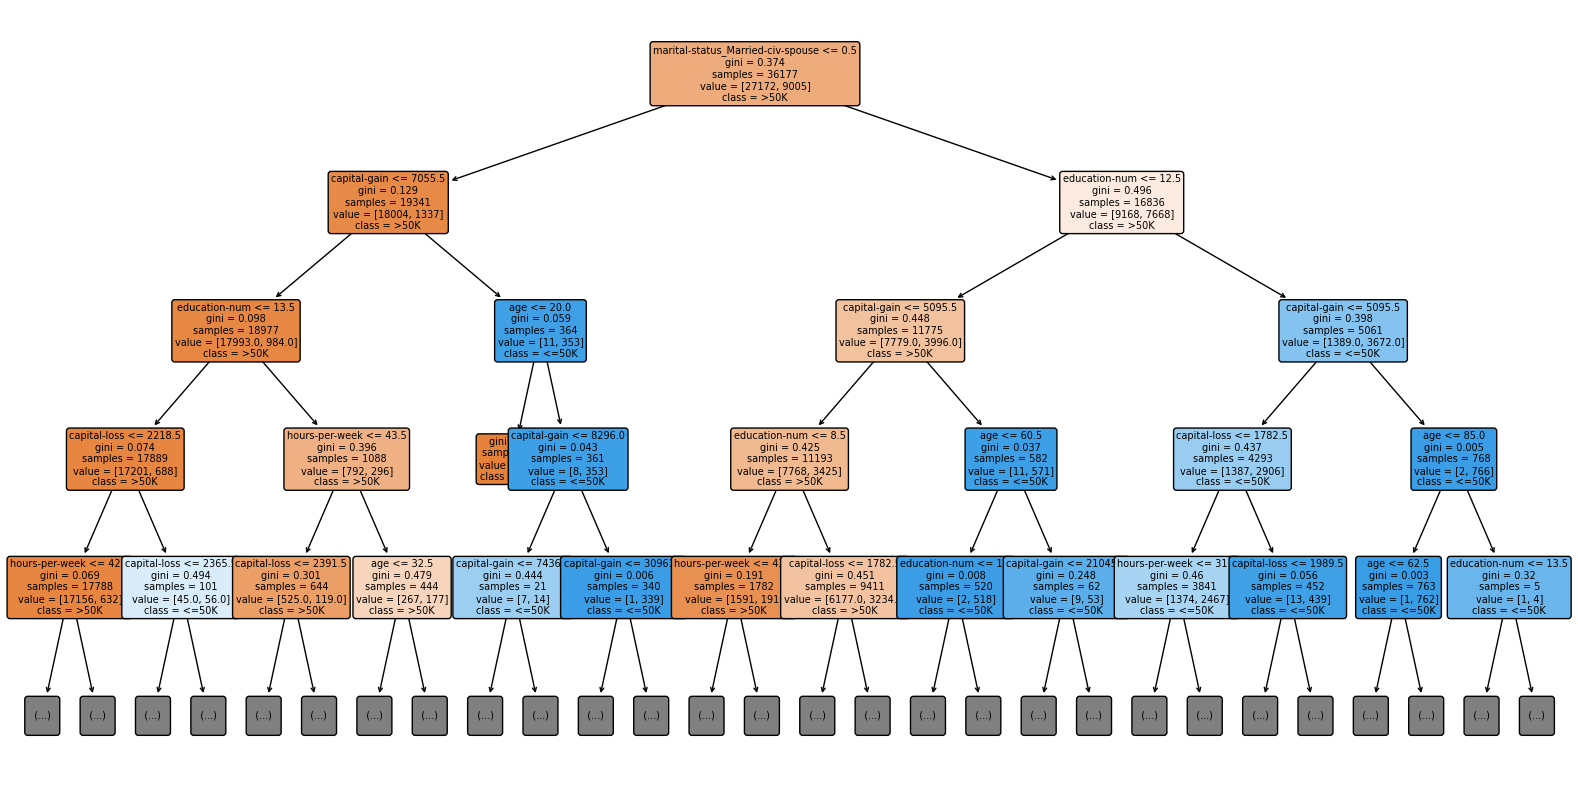

In [49]:
# Arbol de decision graficado
plt.figure(figsize=(20, 10))
plot_tree(model_2, filled=True, rounded = True, feature_names=X.columns, max_depth=4, class_names =[">50K", "<=50K"], fontsize=7)
plt.show()


In [9]:
model_2.feature_importances_

array([0.16283839, 0.18367639, 0.16133215, 0.05995818, 0.11352027,
       0.00421707, 0.00055839, 0.28066839, 0.00131153, 0.00375071,
       0.00237324, 0.00148482, 0.00608441, 0.00340968, 0.00311935,
       0.00229518, 0.00220911, 0.00719273])

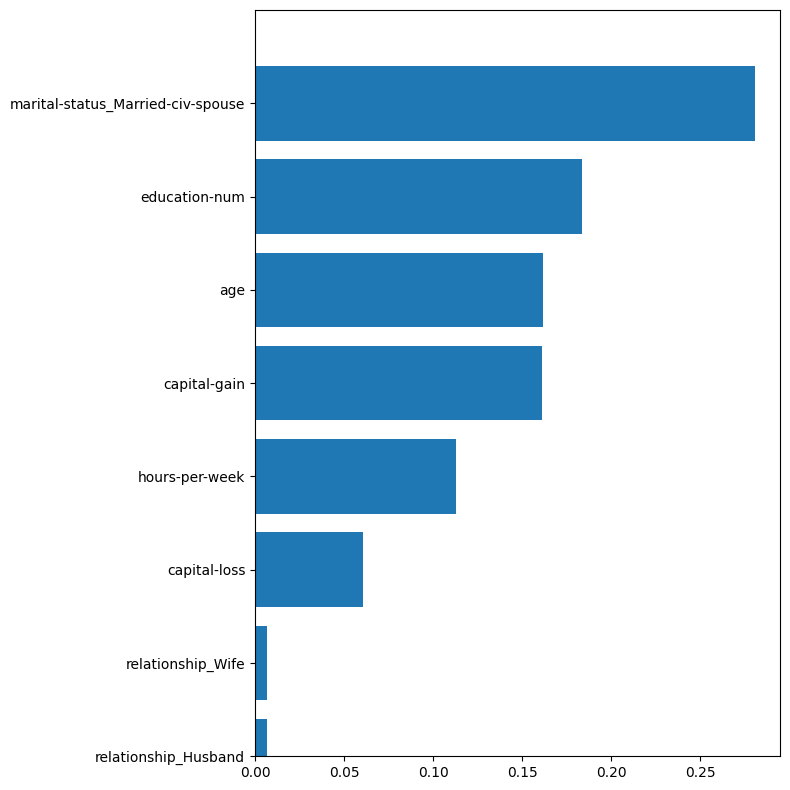

In [56]:
# Visualizacion del feature importance
importance_sorted_idx = np.argsort(model_2.feature_importances_)
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.barh(range(0, 8), model_2.feature_importances_[importance_sorted_idx][-8:], height=0.8)
ax.set_yticks(range(0, 8))
ax.set_yticklabels(X.columns[importance_sorted_idx][-8:])
ax.set_ylim((0, len(model_2.feature_importances_[-8:])))
fig.tight_layout()
plt.show()



En este grafico estan los 8 atributos que provocan la mayor disminucion del gini score.

### Pregunta 2: Entrene otro modelo (que no sea interpretable) y realice el procedimiento necesario para obtener explicabilidad local de este modelo utilizando LIME. Obtenga las explicaciones para las predicciones de 3 registros de los datos de entrenamiento. Comente sus resultados (3 ptos).

**Instrucciones adicionales:**

- Recuerde el uso de LabelEncoder en el pre-procesamiento de sus datos.

In [214]:
# Haremos un copy de df 
df_lime = df.copy()
df_lime.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [215]:
df_lime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   education       45222 non-null  object 
 3   education-num   45222 non-null  float64
 4   marital-status  45222 non-null  object 
 5   occupation      45222 non-null  object 
 6   relationship    45222 non-null  object 
 7   race            45222 non-null  object 
 8   sex             45222 non-null  object 
 9   capital-gain    45222 non-null  float64
 10  capital-loss    45222 non-null  float64
 11  hours-per-week  45222 non-null  float64
 12  native-country  45222 non-null  object 
 13  income          45222 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.8+ MB


In [216]:
# Crear columna de age-cat para discretizar la edad y se dividira en joven y adulto
df_lime['age_cat'] = pd.cut(df_lime['age'], bins=[0, 30, 100], labels=['joven', 'adulto'])
df_lime.drop('age', axis=1, inplace=True)


In [217]:
df_lime.head()

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat
0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,joven
1,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,adulto
2,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,joven
3,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,adulto
4,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K,adulto


In [218]:
df_lime['income'] = df_lime['income'].map({'<=50K': 0, '>50K': 1})
df_lime['age_cat'] = df_lime['age_cat'].map({'joven': 0, 'adulto': 1})
df_lime['sex'] = df_lime['sex'].map({'Male': 1, 'Female': 0})


In [219]:
df_lime.head()


,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat
0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,1,0.0,0.0,40.0,United-States,0,0
1,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,1,0.0,0.0,50.0,United-States,0,1
2,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,1,0.0,0.0,40.0,United-States,1,0
3,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688.0,0.0,40.0,United-States,1,1
4,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,1,0.0,0.0,30.0,United-States,0,1


In [220]:

df_lime.head()

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat
0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,1,0.0,0.0,40.0,United-States,0,0
1,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,1,0.0,0.0,50.0,United-States,0,1
2,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,1,0.0,0.0,40.0,United-States,1,0
3,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688.0,0.0,40.0,United-States,1,1
4,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,1,0.0,0.0,30.0,United-States,0,1


In [221]:
# Separamos X e Y

X = df_lime.loc[:, df_lime.columns != 'income']
y = df_lime.loc[:, df_lime.columns == 'income']

y

,income
0,0
1,0
2,1
3,1
4,0
...,...
45217,0
45218,1
45219,0
45220,0


In [222]:
# Quiero ver el tipo de columnas en X
X.dtypes

workclass           object
education           object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                  int64
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
age_cat           category
dtype: object

In [223]:
# Utilizamos el Label Encoder
to_encode = X.select_dtypes(include=['object'])
encoders = {}

for catcol in to_encode.columns:
    encoder = LabelEncoder()
    X[catcol] = encoder.fit_transform(X[catcol])
    encoders[catcol] = encoder

X.head()

C:\Users\Poble\AppData\Local\Temp\ipykernel_29168\4011710121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[catcol] = encoder.fit_transform(X[catcol])
C:\Users\Poble\AppData\Local\Temp\ipykernel_29168\4011710121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[catcol] = encoder.fit_transform(X[catcol])
C:\Users\Poble\AppData\Local\Temp\ipykernel_29168\4011710121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_cat
0,2,1,7.0,4,6,3,2,1,0.0,0.0,40.0,38,0
1,2,11,9.0,2,4,0,4,1,0.0,0.0,50.0,38,1
2,1,7,12.0,2,10,0,4,1,0.0,0.0,40.0,38,0
3,2,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,38,1
4,2,0,6.0,4,7,1,4,1,0.0,0.0,30.0,38,1


In [224]:
to_encode

,workclass,education,marital-status,occupation,relationship,race,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,White,United-States
...,...,...,...,...,...,...,...
45217,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
45218,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
45219,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
45220,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [241]:
# Datos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=908)

In [242]:
rf = RandomForestClassifier()
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier()

In [243]:
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred)

0.6702230843840931

In [244]:
X_train

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_cat
28441,2,11,9.0,4,0,1,4,0,0.0,0.0,40.0,38,0
33791,2,11,9.0,2,2,0,4,1,0.0,1579.0,40.0,38,0
21441,2,9,13.0,2,11,0,4,1,0.0,0.0,40.0,38,1
9154,2,12,14.0,2,9,5,4,0,0.0,1902.0,45.0,38,1
23791,2,15,10.0,2,2,0,4,1,0.0,0.0,40.0,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6456,2,11,9.0,2,6,0,4,1,0.0,0.0,40.0,38,1
11196,1,8,11.0,4,12,1,4,0,0.0,1564.0,72.0,38,0
25904,1,7,12.0,4,0,4,2,0,0.0,0.0,40.0,38,0
35322,2,9,13.0,2,9,0,4,1,0.0,0.0,50.0,38,1


In [245]:
object_features = [X_train.columns.get_loc(col) for col in to_encode.columns]
object_names = {i: encoders[X_train.columns[i]].classes_ for i in object_features}

In [246]:
object_features

[0, 1, 3, 4, 5, 6, 11]

In [247]:
object_names

{0: array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 1: array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 3: array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 4: array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 5: array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 6: array(['Amer-Indian-Eskimo', 'Asian-Pac-Isl

In [248]:
# Ahora utilizaremos LIME

explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 feature_names=X_train.columns.to_list(),
                                 categorical_features=object_features,
                                 categorical_names=object_names,
                                 discretize_continuous=True,
                                 discretizer='decile',
                                 kernel_width=5)

In [249]:
exp = explainer.explain_instance(X_train.iloc[3,:], rf.predict_proba, num_features=5)


C:\Users\Poble\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


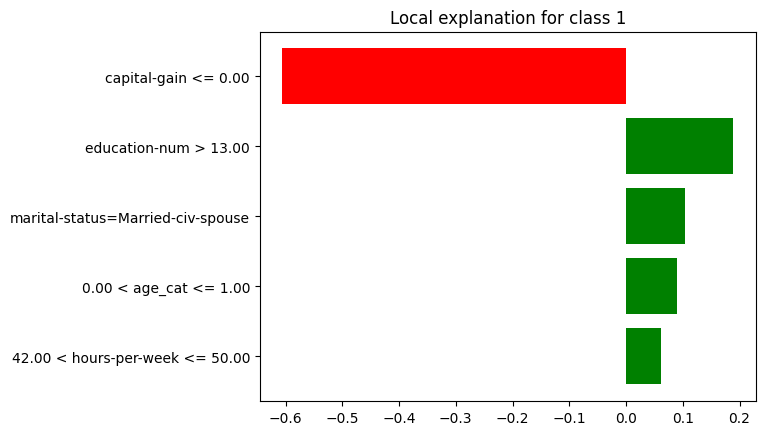

In [250]:
exp.as_pyplot_figure()
plt.show()

In [251]:
exp.show_in_notebook(show_all=False)

In [252]:
pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])

,Feature,Contribution
0,capital-gain <= 0.00,-0.605749
1,education-num > 13.00,0.188819
2,marital-status=Married-civ-spouse,0.104736
3,0.00 < age_cat <= 1.00,0.089062
4,42.00 < hours-per-week <= 50.00,0.062359
